****
<a id='lesson-3'></a>
# Module :  Integration
****

Computing integrals (numerically) is an important task in many computational fields. In this tutorial we will explore two schemes:
- finite difference schemes / grid schemes
- Monte Carlo scheme

Scipy has 'integrate' function: learn its usage to compuate the 'exact' value of the integral


## Grid schemes
Typically used for 1-D or 2-D integrals, by evaluating the value of the function on a regular grid and then using approximation schemes like 'trapezoidal rule'

## Task-1
Following are the sub-tasks
- Write a function that takes as input a *function* and interval, and returns the value of the integral. Assume the fuction to be one-dimensional function
- Using the above function, find the area of a unit circle



## Task-2
 Exploratory task: Adaptive grid size. When the function changes 'too fast', then next grid point is 'closer' (and change is 'too slow', then next grid point is 'farther'). Using thisi adaptive scheme compute the area of unit circle.



## Monte Carlo methods
Monte Carlo methods are typically used when we have very large dimensional integrals.

## Task-3: Compute the area of the quarter unit circle (1st quadrant)  using <span style='color:red'> simple </span> Monte Carlo method


## Task-4
Simple Monte Carlo is almost never used; here is the 'theory' for a more proper usage...

Let us consider an integral:
$$ I = \int_a^b f(x)~dx$$
where $x\in \mathcal{R}^N$. Such multi-dimensional integrals occur in physics, chemistry, all branches of engineering, and one standard technique is to use Monte Carlo sampling. Below is a rather short presenation of connection between sampling and such integrals

### Multi-dimensional integrals using Monte Carlo sampling

$$I = \int_a^b dx~f(x) = \int_a^b dx~\rho(x) \left( \frac{f(x)}{\rho(x)}\right) =\int_a^b \rho(x)~g(x)~dx $$
with the restriction that $\rho(x)\ne0\forall x\in[a,b]$, and $g(x)={f(x)}/{\rho(x)}$.  

When the fuction $\rho(x)$ statisfies the following conditions:
1. $\rho(x) \ge 0~\forall~x\in[a,b]$
2. $\int_a^b dx~\rho(x) = 1$

such a function can be considered a probability density function.

When $\rho(x)$ is a probability density function,
$$ I = \int_a^b \rho(x)~g(x)~dx = \mathbb{E}_{x\sim\rho}~g(x)= \text{average value of } g(x) \text{ with } x \text{ sampled with probability density }\rho(x)$$
The power of the Monte Carlo method comes from the flexibility in the choice of $\rho(x)$. If $\rho(x)$ is so chosen that it is also large when $|f(x)|$ is large and $\rho(x)$ is small when $|f(x)|$ is small, the efficiency of computing the integral is great. In a proper statistics course, this is demostrated by showing that the variance of computation decreases; this will not be attempted here. The 'Monte Carlo' in the name comes from the fact that random sampling of $x$ with probability density $\rho(x)$; gambling in casinos rely heavily on random numbers.

### Task 4.1: Compute area of circle with $\rho(x)=\text{constant}$



### Task 4.2: Compute the are of the circle with $\rho(x)$ being the Gaussian distribution (i.e. normal distribution)



## Task-5 One simple measure of efficiency of computation

What is possible is to check that the efficiency of computation: how 'fast' is the computation? Smaller is the number of function evaluations used, greater is the efficiency. Alternatively, for the same number of function evaluations, lower error would mean greater efficiency.

Compute the graph of $N$ vs $error(N)$ where $N$ is the number of function computations, under various schemes listed below:
1. Naive Monte Carlo
2. Importance Sampling with uniform  distrituion
3. Importance Sampling with Gaussian districutuion



# WORKBOOK STARTS from here

# Grid Based scheme (Task-1)

 We will plot the area of the unit semi-circle (i.e. unit circle with $y>0$). We know that the exact area of the unit semi-circle is $\pi/2$. So to show the assymptotic convergence with respect to the number of intervals ($N$), we will plot $I(N) / (\pi/2)$, which will assymptotically tend to $1$ as $N\rightarrow\infty$

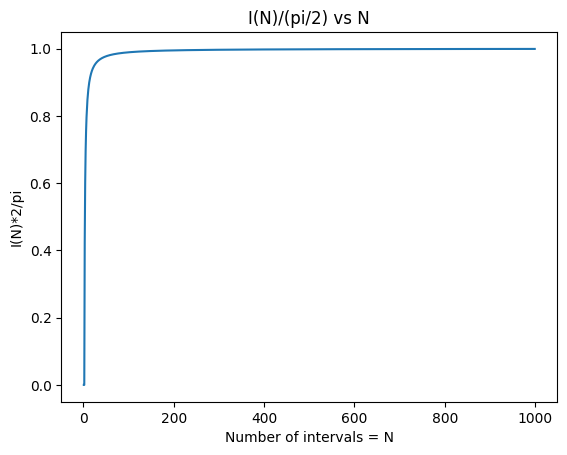

In [1]:
#- Write a function that takes as input a *function* and interval, and returns the value of the integral. Assume the fuction to be one-dimensional function

import numpy as np
import matplotlib.pyplot as plt

def sample_function1(x):
    return np.sqrt(1-x**2)

def integrate(function, limits, no_of_intervals=1000):
    #function will be f(x)
    #limit will be a list of points [a,b]
    #intervals will be the number of intervals to divide the limit into
    x_vals = np.linspace(limits[0], limits[1], no_of_intervals)
    step = (limits[1]-limits[0])/no_of_intervals
    y_vals = function(x_vals)
    return np.sum(np.fromiter(((y_vals[i]+y_vals[i-1])*step/2 for i in np.arange(1,len(x_vals))), dtype=float))

limits = [-1,1]

no_of_intervals = np.arange(1, 1000)
areas_by_real = np.fromiter((integrate(sample_function1, limits, i) for i in no_of_intervals), dtype=float)*2/np.pi

plt.plot(no_of_intervals, areas_by_real)
plt.xlabel('Number of intervals = N')
plt.ylabel('I(N)*2/pi')
plt.title('I(N)/(pi/2) vs N')
plt.show()

# Adaptive grid method (Task-2)

## Homework
Generic idea is the following:
1. $x_0 = a$ and set $i=0$
2. for $ x_i < b$, do the following:
     1. $h_i = ?$ ; choose $h_i$ inversely proportional to absolute value of the derivative, $|f^\prime(x_i)|$
     2. $x_{i+1} = x_{i} + h_i$
     3. compute the contribution of this interval to integral
     3. check $x_{i+1} < b$, if yes end of the interval reached; else increase $i$

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def sample_function1(x):
    return np.sqrt(1-x**2)

def giveDerivative(f,x):
    return -x/np.sqrt(1-x**2+1e-40)

def adaptive_integrate(function, limits):
    x_vals = np.array([limits[0]]) #start with the lower limit
    x = limits[0]
    
    while x < limits[1]:
        h = 1 / (np.abs(giveDerivative(function, x))) #step size is inversely proportional to the derivative, consider a parabola type curve
        x = x + h 
        if x > limits[1]:
            break
        x_vals = np.append(x_vals, x)
        
    x_vals = np.append(x_vals, limits[1]) #last point is the upper limit
    y_vals = function(x_vals)
    
    # plt.plot(x_vals, y_vals)
    # plt.fill_between(x_vals, y_vals, color='gray', alpha=0.5)
    # plt.show()
    
    return np.sum(np.fromiter(((y_vals[i]+y_vals[i-1])*(x_vals[i]-x_vals[i-1])/2 for i in np.arange(1,len(x_vals))), dtype=float)) #return the area

limits = [-1,1]
ratio = adaptive_integrate(sample_function1, limits)/(np.pi/2)
print(ratio) #should be close to 1

KeyboardInterrupt: 

In [24]:
import scipy.integrate as spi

function = np.sin
limits = [0, np.pi]
area_by_adaptive = adaptive_integrate(function, limits)
print(area_by_adaptive)
real_area = spi.quad(function, limits[0], limits[1])[0]
print(real_area)

1.9999942076222954
2.0


# Task-3  
Area of quarter circle using naive Monte Carlo


Consider a unit square. Generate $N$ random points _inside_ this square. Consider the quarter circle (or any other shape) that is completely inside the square. We can estimate the are of the quarter circle by using the probilistic argument that the ratio of areas of quarter circle and square equals the fraction of points that lie inside the quarter circle. That is:
$$ \frac{A_c}{A_s} = \lim_{N_s \rightarrow\infty}\frac{N_c}{N_s}
$$
where subsrcipt $c$ and $s$ are used to denote properties of quarter-circle and square respectively; and $A$ stands for area and $N$ stands for number of points



1. function ComputeQuarterCircleArea(num_random_pts)
2. for each pt in range(num_random_pts):
        set pt = (random x, random y)
        check if pt is inside the circle
3. Estimate area of the quarter cicle.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def ComputeQuarterCircleArea(num_random_pts):
    pts = np.random.rand(num_random_pts, 2) #this generates random points in the square [0,1]x[0,1]
    return np.sum(np.fromiter(((pts[i, 0]**2+pts[i, 1]**2) < 1 for i in np.arange(len(pts))), dtype=float))/num_random_pts #return the ratio of points inside the quarter circle

num_random_pts = 100000
area = ComputeQuarterCircleArea(num_random_pts)
print(f'Area of quarter circle = {area} and pi/4 = {np.pi/4}')

Area of quarter circle = 0.78525 and pi/4 = 0.7853981633974483


### Task 4.1: Compute area of circle with $\rho(x)=\text{constant}$

1. MonteCarlo_Uniform(f,a,b,num_points): to integrate f in x in [a,b] using num_point samples of uniform distribution


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sample_function1(x):
    return np.sqrt(1-x**2)

def MonteCarlo_Uniform(f, a, b, num_pts):
    #calculate area of the unit circle between a and b
    #number of samples of uniform dist is num_pts
    probability_function = 1/num_pts 
    x_vals = np.random.uniform(a, b, num_pts) #generate random points between -1 and 1 using uniform distribution
    y_vals = f(x_vals) #calculate the y values
    return (b-a)*probability_function*np.sum(np.fromiter(y_vals, dtype=float)) #finds only the area of the stuff above the x-axis
    
num_pts = 100000
area = 2*MonteCarlo_Uniform(sample_function1, -1, 1, num_pts) #multiply by 2 to get the area of the whole circle
print(f'Area of circle = {area} and pi = {np.pi}')

Area of circle = 3.1417181189694303 and pi = 3.141592653589793


## Task 4.2: Similar to  Task 4.1

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

def sample_function1(x):
    return np.sqrt(1-x**2)

def MonteCarlo_Gaussian(f, a, b, num_pts):
    #calculate area of the unit circle between a and b
    #number of samples of uniform dist is num_pts
    #here probability function varies for each x
    trunc_normal = stats.truncnorm(a, b, loc=0, scale=1)  #create truncated normal distribution
    x_vals = trunc_normal.rvs(num_pts) # generate tge x values now
    y_vals = f(x_vals) #calculate the y values
    return np.sum(np.fromiter(y_vals/trunc_normal.pdf(x_vals), dtype=float))/num_pts #finds only the area of the stuff above the x-axis
    
num_pts = 100000
area = 2*MonteCarlo_Gaussian(sample_function1, -1, 1, num_pts)
print(f'Area of circle = {area} and pi = {np.pi}')

Area of circle = 3.1427695480577635 and pi = 3.141592653589793


## Task 5: One simple measure of efficiency of computation

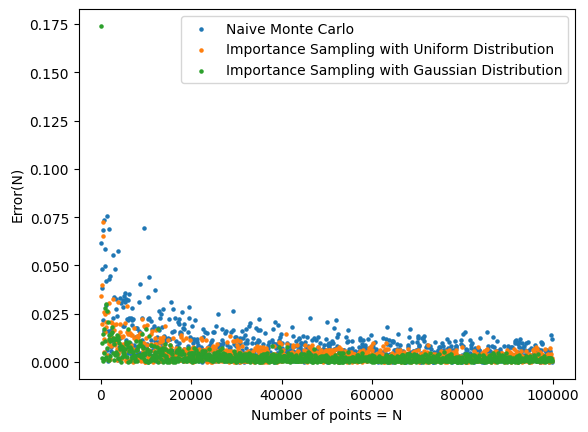

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

def circle_function(x):
    return np.sqrt(1-x**2)

def naiveMonteCarlo(num_pts):
    pts = np.random.rand(num_pts, 2)
    inside_circle = np.sum(pts[:, 0]**2 + pts[:, 1]**2 < 1)
    return 4 * inside_circle / num_pts

def importanceSamplingUniform(f, num_pts, a=-1, b=1):
    x = np.random.uniform(a, b, num_pts)
    y = f(x)
    return 2*(b-a)*np.sum(y)/num_pts

def importanceSamplingGaussian(f, num_pts, a=-1, b=1, mu=0, sigma=1):
    trunc_normal = stats.truncnorm(a, b, loc=mu, scale=sigma)
    x = trunc_normal.rvs(num_pts)
    y = f(x)
    return 2*np.sum(y/trunc_normal.pdf(x))/num_pts

num_pts = np.arange(100, 100000, 100)

# calculating the areas, then the absolute errors from those areas
error_naive = np.abs(np.array([naiveMonteCarlo(i) for i in num_pts]) - np.pi)
error_uniform = np.abs(np.array([importanceSamplingUniform(circle_function, i) for i in num_pts]) - np.pi)
error_gaussian = np.abs(np.array([importanceSamplingGaussian(circle_function, i) for i in num_pts]) - np.pi)

#plot the scatterplot now
plt.scatter(num_pts, error_naive, label='Naive Monte Carlo', s=5)
plt.scatter(num_pts, error_uniform, label='Importance Sampling with Uniform Distribution', s=5)
plt.scatter(num_pts, error_gaussian, label='Importance Sampling with Gaussian Distribution', s=5)
plt.xlabel('Number of points = N')
plt.ylabel('Error(N)')
plt.legend()
plt.show()